In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
train = pd.read_csv('archive (14)/sign_mnist_train.csv')
test = pd.read_csv('archive (14)/sign_mnist_test.csv')

In [14]:
labels = train['label'].values
unique_val = np.array(labels)
np.unique(unique_val)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int64)

In [15]:
train.drop('label', axis = 1, inplace = True)
images = train.values
images = np.array([np.reshape(i, (28, 28)) for i in images])
images = np.array([i.flatten() for i in images])

In [16]:
from sklearn.preprocessing import LabelBinarizer
label_binrizer = LabelBinarizer()
labels = label_binrizer.fit_transform(labels)

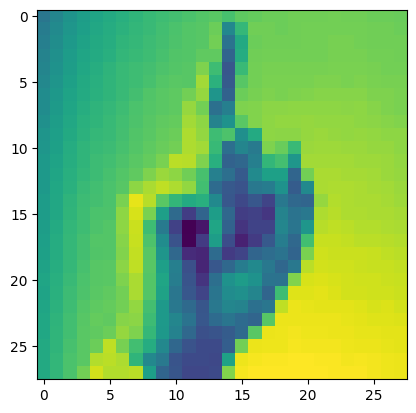

In [17]:
plt.imshow(images[0].reshape(28,28))

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.3, random_state = 101)

In [19]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

In [20]:
batch_size = 128
num_classes = 24
epochs = 20
x_train = x_train / 255
x_test = x_test / 255
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

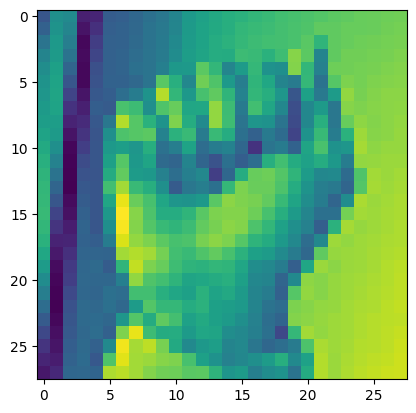

In [21]:
plt.imshow(x_train[0].reshape(28,28))

In [22]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu', input_shape=(28, 28 ,1) ))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.20))

model.add(Dense(num_classes, activation = 'softmax'))

c:\Users\HP\OneDrive\Desktop\Machine Learning Project\myvenv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
model.compile(loss = keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [24]:
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=epochs, batch_size=batch_size)

Epoch 1/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 16s 73ms/step - accuracy: 0.1260 - loss: 2.9165 - val_accuracy: 0.5552 - val_loss: 1.4119
Epoch 2/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 10s 68ms/step - accuracy: 0.5770 - loss: 1.2920 - val_accuracy: 0.7721 - val_loss: 0.7105
Epoch 3/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 11s 71ms/step - accuracy: 0.7532 - loss: 0.7327 - val_accuracy: 0.8554 - val_loss: 0.4455
Epoch 4/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 12s 77ms/step - accuracy: 0.8408 - loss: 0.4633 - val_accuracy: 0.9246 - val_loss: 0.2515
Epoch 5/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 12s 76ms/step - accuracy: 0.9041 - loss: 0.2906 - val_accuracy: 0.9405 - val_loss: 0.1967
Epoch 6/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 11s 70ms/step - accuracy: 0.9257 - loss: 0.2204 - val_accuracy: 0.9819 - val_loss: 0.0859
Epoch 7/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 10s 68ms/step - accuracy: 0.9564 - loss: 0.1375 - val_accuracy: 0.9914 - val_loss: 0.0573
Epoch 8/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 10s 67ms/step - accuracy: 0.9692 - loss: 0.1071 - 

In [25]:
test_labels = test['label']
test.drop('label', axis = 1, inplace = True)
test_images = test.values
test_images = np.array([np.reshape(i, (28, 28)) for i in test_images])
test_images = np.array([i.flatten() for i in test_images])
test_labels = label_binrizer.fit_transform(test_labels)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)
test_images.shape
(7172, 28, 28, 1)


y_pred = model.predict(test_images)
from sklearn.metrics import accuracy_score
accuracy_score(test_labels, y_pred.round())

225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step


0.8714445064138315

In [26]:
def getLetter(result): 
    classLabels = { 0:'A',
                    1:'B',
                    2:'C',
                    3:'D',
                    4:'E',
                    5:'F',
                    6:'G',
                    7:'H',
                    8:'I',
                    9:'K',
                    10:'L',
                    11:'M',
                    12:'N',
                    13:'0', 
                    14:'P',
                    15:'Q',
                    16:'R',
                    17:'S',
                    18:'T',
                    19:'U',
                    20:'V',
                    21:'W',
                    22:'X',
                    23:'Y'}
    try:
        res = int(result)
        return classLabels[res]
    except:
      return "Error"

In [27]:
import cv2
def recognize_sign_language():
    ROI_TOP_LEFT = (320, 100)
    ROI_BOTTOM_RIGHT = (620, 400)
    ROI_SIZE = (28, 28)
    cap = cv2.VideoCapture(0)
    try:
        while True:
            ret, frame = cap.read()
            if not ret:
                break

            roi = frame[ROI_TOP_LEFT[1]:ROI_BOTTOM_RIGHT[1], ROI_TOP_LEFT[0]:ROI_BOTTOM_RIGHT[0]]
            cv2.imshow('ROI', roi)

            roi_gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
            roi_resized = cv2.resize(roi_gray, ROI_SIZE, interpolation=cv2.INTER_AREA)
            cv2.imshow('ROI scaled and gray', roi_resized)

            copy = frame.copy()
            cv2.rectangle(copy, ROI_TOP_LEFT, ROI_BOTTOM_RIGHT, (255, 0, 0), 5)

            roi_reshaped = roi_resized.reshape(1, *ROI_SIZE, 1)
            result = str(np.argmax(model.predict(roi_reshaped, 1, verbose=0), axis=1)[0])
            cv2.putText(copy, getLetter(result), (300, 100), cv2.FONT_HERSHEY_COMPLEX, 2, (0, 255, 0), 2)
            cv2.imshow('Frame', copy)

            if cv2.waitKey(1) == 13:  # 13 is the Enter Key
                break
    finally:
        cap.release()
        cv2.destroyAllWindows()

In [39]:
import tkinter as tk
from tkinter import messagebox
root = tk.Tk()
root.title("Sign Letter Recognition (NULL CLASS)")
root.geometry("500x500")  


def on_button_click():
    messagebox.showinfo("NULL CLASS", "Are you sure to starting Sign language Recognition")
    recognize_sign_language()
    
button = tk.Button(root, text="Click here to open Camera", font=("Arial", 20), command=on_button_click,fg="pink",bg="black")
button.pack(pady=200)  
root.mainloop()